# Исследование объявлений о продаже квартир

Входные данные данные сервиса о недвижимости — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Задача — установить параметры для определения рыночной стоимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. 

Описание данных:

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах(м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

## Шаг 1. Изучение общей информации 

In [22]:
import matplotlib.pyplot as plt # выгружаем необходимые библиотеки
import pandas as pd
import numpy as np


In [23]:
realty = pd.read_csv('/datasets/real_estate_data.csv', sep="\t") #устанавливаем как разделитель знак табуляции

In [24]:
realty.head(15)#изучаем первые строки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [25]:
realty.info()#изучение общей информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Данные для анализа представляют собой таблицу в формате csv. 
Исходная таблица содержит 22 столбца, 23699 строк.
В наличии нулевые и пропущенные значения. Необходимо определить их природу и обработать.
Типы данных различны:  bool(2), float64(14), int64(3), object(3). Для дальнейших арифметических действий необходимо привести числовые данные к единому типу, строковые типы, по возможности, так же привести к числовому.

## Шаг 2. Предобработка данных

In [26]:
'''Определение и обработка пропущенных значений'''

realty.isnull().sum() # находим сумму неопределенных и пропущенных значений

# В данных большое колличество пропусков. Для корректной обработки 
#необходимо рассмотреть и выяснить причины пропусков по каждому показателю.

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [27]:
'''Обработка пропусков в столбце ceiling_height '''

print(realty['ceiling_height'].describe()) 
median_height = realty['ceiling_height'].mean() #сохраняем среднее значение по столбцу в отдельной переменной
realty['ceiling_height'] = realty['ceiling_height'].fillna(median_height) #заполняем пропуски средним значением
print('Количество пропущеных значений в столбце после заполнения:', realty['ceiling_height'].isnull().sum()) 

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
Количество пропущеных значений в столбце после заполнения: 0


Наличие пропусков в данном столбце может быть объяснено отсутствием информации в объявлении. Вероятно,
высота потолков на этих объектов стандартная и, по мнению, "продавца" не влияет на стоимость.
Для корректности дальнейшей работы, заполним попуски средним значением по столбцу.
Изучаем характерные значения. Видны стандартные отклонения, минимальная 
высота - 1 метр. максимальная - 100. Сложно представить квартиры с такими потолками. В дальнейших шагах 
необходимо рассмотреть данные подробнее и определить насколько часто встречаются и как влияют на результат.
Тем не менее, среднее значение похоже на среднюю высоту потолков  в стандартных квартирах страны- 2.65. 
Этой величиной заменим пропуски.

In [28]:
'''Обработка пропусков в столбце floors_total'''

realty['floors_total'] = realty['floors_total'].fillna(value=777)
print('Количество пропущеных значений в столбце после заполнения:', realty['floors_total'].isnull().sum())

Количество пропущеных значений в столбце после заполнения: 0


Наличие пропусков в данном столбце может быть объяснено отсутствием информации в объявлении. Этажность дома 
легко определить реальному пользователю. Замена пропусков в данном столбце может привести к искажению данных.
Необходимо учитывать этаж продаваемого объекта - как минимум, значение в floor не должно быть больше, чем в floors_total
Так как остальные данные в строке необходимы для анализа, заменим пропуски условным 777, для того, чтобы в дальнейшем заменить тип.

In [29]:
'''Обработка пропусков в столбцах living_area и kitchen_area'''

realty['kitchen_total'] = realty['kitchen_area'] / realty['total_area'] #найдем отношение площади в новом столбце
kitchen_mean = realty['kitchen_total'].mean() # выделим средний показатель
realty['kitchen_area'] = realty['kitchen_area'].fillna(realty['total_area']*kitchen_mean) #заполняем пропуски
print('Количество пропущеных значений в столбце после заполнения:', realty['kitchen_area'].isnull().sum()) 

Количество пропущеных значений в столбце после заполнения: 0


Наличие пропусков может быть связано со сложностью измерения данных площадей в условиях перепланировки, 
квартир - студий, квартир с объединенной гостинной. Для заполнения пропусков найдем средний показатель 
интересующих площадей к общей площади total_area.

In [30]:
realty['living_total'] = realty['living_area'] / realty['total_area'] 
living_mean = realty['living_total'].mean() 
realty['living_area'] = realty['living_area'].fillna(realty['total_area']*living_mean)
print('Количество пропущеных значений в столбце после заполнения:', realty['living_area'].isnull().sum())

Количество пропущеных значений в столбце после заполнения: 0


In [31]:
'''Обработка пропусков в столбце is_apartment'''
realty['is_apartment'].unique() # проверка уникальных зачений.

realty['is_apartment'] = realty['is_apartment'].fillna(value=False)
print('Количество пропущеных значений в столбце после заполнения:', realty['is_apartment'].isnull().sum())

Количество пропущеных значений в столбце после заполнения: 0


Наличие пропусков может быть связано с пропуском данного блока в форме объявления. 
Так как, по количеству, 
аппартаменты - скорее исключение, пропуски заменим значением False. В дальнейшей работе необходимо заменить
тип данных на числовой, для возможности подсчета и других операций.

In [32]:
'''Обработка пропусков в столбце balcony'''

realty['balcony'] = realty['balcony'].fillna(0)
print('Количество пропущеных значений в столбце после заполнения:', realty['balcony'].isnull().sum())

Количество пропущеных значений в столбце после заполнения: 0


Наличие пропусков в данном столбце может озночать фактическое отсутствие балконов в объекте. 
Заменим пропуски 0.

In [33]:
'''Обработка пропусков в столбце locality_name'''

realty['locality_name'] = realty['locality_name'].fillna(value='Другие')
print('Количество пропущеных значений в столбце после заполнения:', realty['locality_name'].isnull().sum())

Количество пропущеных значений в столбце после заполнения: 0


Наличие пропусков может означать отсутствие принадлежности локации продаваемого объекта какому-либо населенному
пункту. Так же, возможна ошибка ввода, т.к. % пропусков крайне низкий, относительно всей таблицы.
Так как нет возможности найти корректную замену данным, выделим пропущенные данные в категорию "Другие"

In [34]:
'''Обработка пропусков в столбцах parks_around3000 и ponds_around3000'''

realty['parks_around3000'] = realty['parks_around3000'].fillna(0)
realty['ponds_around3000'] = realty['ponds_around3000'].fillna(0)
print('Количество пропущеных значений в столбце после заполнения:', realty['parks_around3000'].isnull().sum())
print('Количество пропущеных значений в столбце после заполнения:', realty['ponds_around3000'].isnull().sum())

Количество пропущеных значений в столбце после заполнения: 0
Количество пропущеных значений в столбце после заполнения: 0


 Данные в этих столбцах получены автоматически на основе картографических данных, и показывают фактическое
наличие указанного объекта в радиусе 3 км.
Соответственно, наличие пропусков может говорить либо об ошибке, либо  об отсутствии объекта. Так, логично 
заменить пропуски на 0.

In [35]:
'''Обработка пропусков в столбцах airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest'''
# Данные в этх столбцах получены автоматически на основе картографических данных, и несут точные данные, 
# относительно удаленности определенного объекта. Данные пропуски не корректно заменять средним значением или 0.
# Так как при дальнейшем анализе информация определенно скорректирует выводы и точность будет потеряна.
# Заменим пропуски на условное '-1'. В дальнейшем будем учитывать, что эти данные означают пропуск.

'''Обработка пропусков в столбце days_exposition'''
# Наличие пропусков в данной таблице может означать, что объявление до сих пор не снято. Это важные данные,
# изменение которых, может повлечь потерю точности. Заменим пропуски на условное '-1'. В дальнейшем будем 
# учитывать, что эти данные означают пропуск.
for column in [ 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest', 'days_exposition']:
    realty[column] = realty[column].fillna(value=-1)


In [36]:
realty.isnull().sum() # общая проверка пропусков. Заполнены пропуски там, где это уместно.

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
kitchen_total           2278
living_total            1903
dtype: int64

In [37]:
'''Изменение типов данных. float24'''
# 13 столбцов таблицы имеют тип float24. 
# Вещественные числа не поддерживают длинную арифметику и усложняют читаемость. 
# Для корректных расчетов при анализе и удобства сравнения, заменим тип на int.
# Для того, чтобы сохранить максимальную точность.

for column in ['last_price', 'total_area', 'ceiling_height', 'floors_total', 'living_area','living_area', 'living_area', 'kitchen_area', 'balcony', 'airports_nearest','cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']:
    realty[column] = realty[column].astype(int, errors='ignore')

In [38]:
'''Изменение типа object'''
# Столбец first_day_exposition имеет строковый тип данных. Переведем данные в корректный для даты и времени 
# формат для дальнейших действий.
realty['first_day_exposition'] = pd.to_datetime(realty['first_day_exposition'],format='%Y.%m.%dT%H:%M:%S')
realty.info() # общая проверка изменений типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null int64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null int64
floors_total            23699 non-null int64
living_area             23699 non-null int64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null int64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000        23699

### Вывод по предобработке данных: 

Большой объем пропущенных значений может говорить об ошибке ввода, тем не менее, для исключения пропусков
в дальшейшей работе, необходимо предложить корректировки в формат заполнения пользователем данных для размещения объявления. Необходимо добавить все интересующие для аналитики поля в раздел "обязательны к заполнению".
При отсутствии информации, пользователь может отметить этот факт, выбрав соответствующий вариант из меню.Таким образом, при анализе, будет точно определена причина отсутствия информации, точность будет выше, снизится количество фейковых обхявлений.
Пропуски обработаны там, где это возможно. Данные подготовлены к дальнейшему анализу.

## Шаг 3. Вспомогательные расчеты и дополнение данных

In [39]:
realty['price'] = realty['last_price'] / realty['total_area'] # цены квадратного метра. Для расчета делим 
# стоимость в момент снятия объявления на общую площадь квартиры.

realty['weekday_exposition'] = realty['first_day_exposition'].dt.weekday # день недели публикации
realty['month_exposition'] = pd.DatetimeIndex(realty['first_day_exposition']).month # месяц публикации
realty['year_exposition'] = pd.DatetimeIndex(realty['first_day_exposition']).year # год публикации

# Для добавления этажности используем функцию одной строки
def floor_floors_total(row):
    '''Возвращает этаж квартры, используя правила:
    - 'первый' при значении floor == 1
    - 'последний' при значении floor == floors_total
    - 'другой' во всех остальных случаях '''
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor > 1:
        if floor == floors_total:
            return 'последний'
        return 'другой'
realty['floor_order'] = realty.apply(floor_floors_total, axis=1) # столбец с этажом объекта

# Обновим существующие столбцы отношения жилой площади и площади кухни к общей площади с учетом заполненных 
#пропусков
realty['living_total'] = realty['living_area'] / realty['total_area']*100
realty['kitchen_total'] = realty['kitchen_area'] / realty['total_area']*100

realty.head(15) # проверка добавлений

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,kitchen_total,living_total,price,weekday_exposition,month_exposition,year_exposition,floor_order
0,20,13000000,108,2019-03-07,3,2,16,51,8,False,...,2,755,-1,23.148148,47.222222,120370.370370,3,3,2019,другой
1,7,3350000,40,2018-12-04,1,2,11,18,1,False,...,0,-1,81,27.500000,45.000000,83750.000000,1,12,2018,первый
2,10,5196000,56,2015-08-20,2,2,5,34,4,False,...,2,574,558,14.285714,60.714286,92785.714286,3,8,2015,другой
3,0,64900000,159,2015-07-24,3,2,14,89,9,False,...,3,234,424,18.238994,55.974843,408176.100629,4,7,2015,другой
4,2,10000000,100,2018-06-19,2,3,14,32,13,False,...,1,48,121,41.000000,32.000000,100000.000000,1,6,2018,другой
5,10,2890000,30,2018-09-10,1,2,12,14,5,False,...,0,-1,55,30.000000,46.666667,96333.333333,0,9,2018,другой
6,6,3700000,37,2017-11-02,1,2,26,10,6,False,...,0,-1,155,37.837838,27.027027,100000.000000,3,11,2017,другой
7,5,7915000,71,2019-04-18,2,2,24,40,22,False,...,0,-1,-1,25.352113,56.338028,111478.873239,3,4,2019,другой
8,20,2900000,33,2018-05-23,1,2,27,15,26,False,...,0,-1,189,24.242424,45.454545,87878.787879,2,5,2018,другой
9,18,5400000,61,2017-02-26,3,2,9,43,7,False,...,0,-1,289,9.836066,70.491803,88524.590164,6,2,2017,другой


### Вывод по добавлению данных: 

Добавлены и обновлены все необходимые дополнительные данные. Качественная предобработка данных позволяет проводить вычисления корректно и быстро.


## Шаг 4. Исследовательский анализ данных

In [40]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #изменение глобальной настройки отображения 

In [41]:
def info_graf(data,row):
    "Изучает основную информацию по столбцу"
    "Использует межквартильный размах для определения диапазона построения графика. Работает от 5 до 10 сек."
    print(row.describe())
    row.hist(bins='auto',range = (row.min(), row.max()))
    plt.show()
    row.hist(bins='auto',range = (row.min(), row.quantile(.33)))
    plt.show()
    row.hist(bins='auto',range = (row.quantile(.33), row.quantile(.66)))
    plt.show()
    row.hist(bins='auto',range = (row.quantile(.66), row.max()))
    plt.show()
    data.boxplot(row.name)
              


###  Изучение параметра "Общая площадь"

count   23699.000
mean       60.121
std        35.666
min        12.000
25%        40.000
50%        52.000
75%        69.000
max       900.000
Name: total_area, dtype: float64


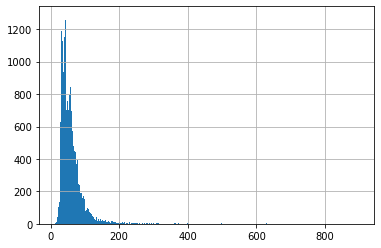

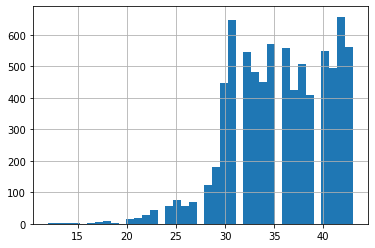

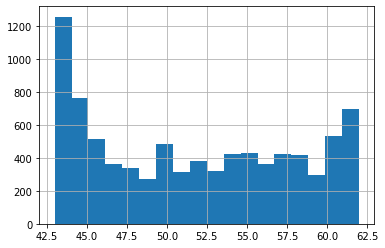

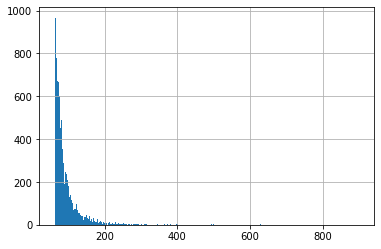

(array([21898,  1536,   180,    51,    18,    11,     4,     0,     0,
            1]),
 array([ 12. , 100.8, 189.6, 278.4, 367.2, 456. , 544.8, 633.6, 722.4,
        811.2, 900. ]))

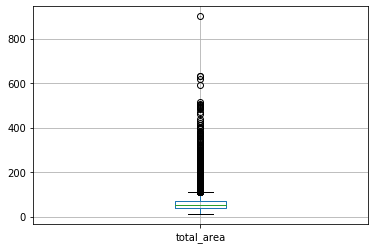

In [42]:
info_graf(realty,realty['total_area']) # первичный анализ данных. Стандартное отклонение высокое- 8кв.м. 
# Стандартная площадь выше медианного показателя. На отклонение влияет максимальное значение в столбце, которое 
# значительно увеличивает средний показатель по метражу объектов.
np.histogram(realty['total_area'])

Основная часть представленных объектов имеют площадь до 170 кв.м. Примерно до 260 кв.м. встречаются квартиры, но их значительно меньше. Есть, так же, разовые вариантыобъектов 300 -390 кв.м. Объекта площадью 900 кв.м. даже не видно на гистограмме. 
Согласно исследованиям аналитиков ЦИАН 2019 г. самая большая площадь квартиры в Санкт-Петербурге составила 
690 кв.м. Таким образом, мы либо нашли новый объект, который побил рекорд, либо произошла ошибка ввода данных.

In [43]:
print(len(realty.query('total_area >= 260')) / len(realty)) #Как видим, количество квартир площадью больше 
#260кв.м крайне мало. В исправленной таблице оставим данные > 260

0.004092999704628887


### Изучение цены

count       23699.000
mean      6541548.772
std      10887013.268
min         12190.000
25%       3400000.000
50%       4650000.000
75%       6800000.000
max     763000000.000
Name: last_price, dtype: float64


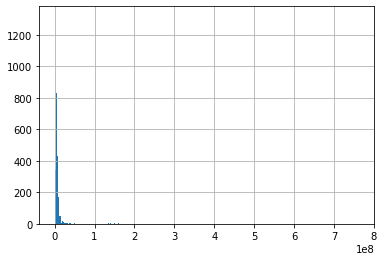

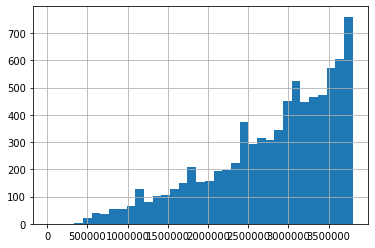

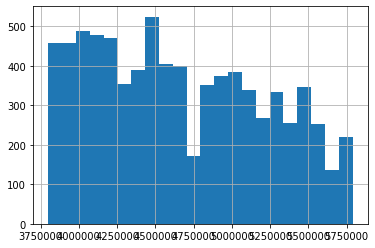

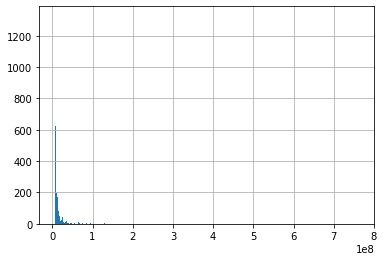

(array([23632,    52,     6,     5,     1,     2,     0,     0,     0,
            1]),
 array([1.21900000e+04, 7.63109710e+07, 1.52609752e+08, 2.28908533e+08,
        3.05207314e+08, 3.81506095e+08, 4.57804876e+08, 5.34103657e+08,
        6.10402438e+08, 6.86701219e+08, 7.63000000e+08]))

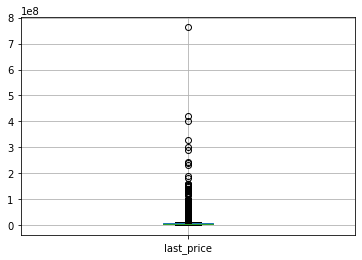

In [44]:
info_graf(realty,realty['last_price'])
#print(realty[].describe()) # В данном случае, стандартное отклонение так же высокое - 20 млн. 
#realty['last_price'].hist(bins=100, range=(0, 15*10**6)) 
np.histogram(realty['last_price']) 

In [45]:
print(len(realty.query('last_price > 45000000')) / len(realty))
print(len(realty.query('last_price < 400000')) / len(realty))# объекты, стоимостью ниже составляют значительную
# часть данных. Данные явно с ошибкой. Проверим процент данных,составляющие минимальное значение "12190"
print(len(realty.query('last_price == "12190"')) / len(realty)) # % таких данных совпадает. Об этом стоит 
#сообщить разработчикам. Возможно данные указаны за квадратный метр или для аренды. Но обхем таких данных все 
# равно большой.

print(realty.query('45000000 >= last_price >= 400000')['last_price'].describe()) #в итоге ограничения выбросов 
#средний показатель приблизился к медиане на миллион.
last_price_normal = realty.query('45000000 >= last_price >= 400000')# сохраним данные в отдельной переменной.


0.006793535592219081
4.2195873243596775e-05
4.2195873243596775e-05
count      23537.000
mean     5945818.810
std      4743345.628
min       430000.000
25%      3400000.000
50%      4600000.000
75%      6700000.000
max     45000000.000
Name: last_price, dtype: float64


### Изучение количества комнат

count   23699.000
mean        2.071
std         1.078
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        19.000
Name: rooms, dtype: float64


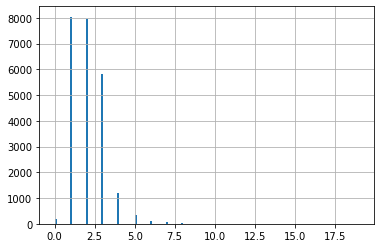

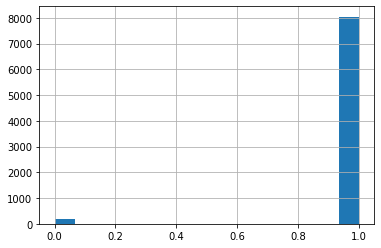

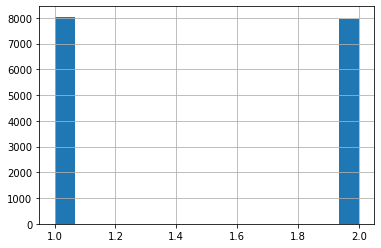

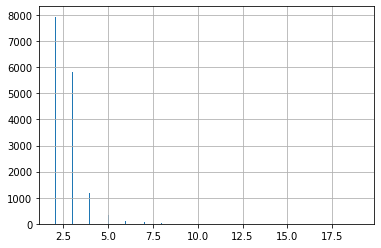

(array([ 8244, 13754,  1506,   164,    20,     5,     1,     3,     1,
           1]), array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]))


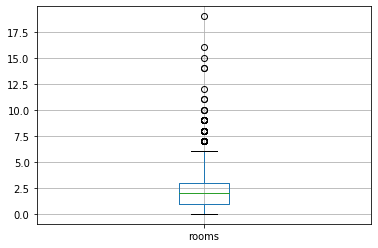

In [46]:
info_graf(realty,realty['rooms']) # Стандартное отклонение практически в норме. При этом, присутствуют
#квартиры без комнат.
print(np.histogram(realty['rooms'])) 
# И, все же, основную массу объектов сотавляют квартиры от 1 до 20 комнат.

Основная часть данных по смотимости квартир заключается в границе 6 корзины.
Выше 45 миллионов есть только один объект стоимостью 763 млн. Вероятно, это квартира площадью 900 кв.м. Данный
пример является скорее исключением, при этом значительно усложняет процесс изучения данных. Также, есть квартиры, стоимостью 12190 рублей. Скорее всего, была допущенв ошибка и потерялся 0, либо пользователь указал цену за кв.м.
Стоит рассмотреть дополнительно как мнго квартир с нетипично низкой стоимостью, а для выделения закономерностей, изучать классические случаи. Квартир 900 кв.м. и стоимостью почти в миллиард рублей не так много.

In [47]:
print(len(realty.query('rooms > 7')) / len(realty))# квартиры с количеством комнат больше, чем 7 встречаются редко.
print(len(realty.query('rooms < 1')) / len(realty)) # квартиры без комнат выглядят совершенно нереально. Даже
# студии подразумевают под собой пространство - комнату. Отбросии подозрительные значения ради корректностианализа.
print(realty.query('7 >= rooms >= 1')['rooms'].describe()) #в итоге ограничения выбросов средний показатель
# приблизился к медиане.
rooms_normal = realty.query('7 >= rooms >= 1')# сохраняем данные в отдельной переменной.

0.0013080720705515002
0.008312587028988565
count   23471.000
mean        2.078
std         1.022
min         1.000
25%         1.000
50%         2.000
75%         3.000
max         7.000
Name: rooms, dtype: float64


### Изучение высоты потолков

count   23699.000
mean        2.142
std         1.033
min         1.000
25%         2.000
50%         2.000
75%         2.000
max       100.000
Name: ceiling_height, dtype: float64


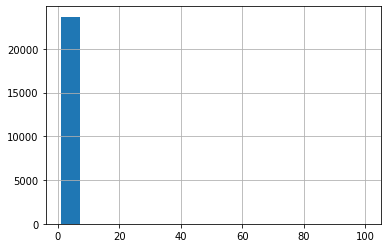

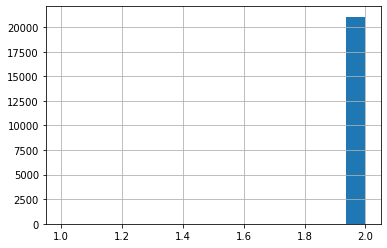

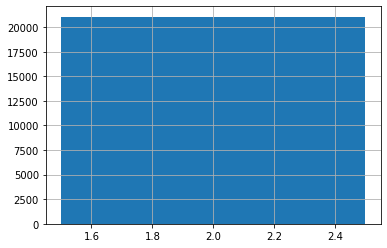

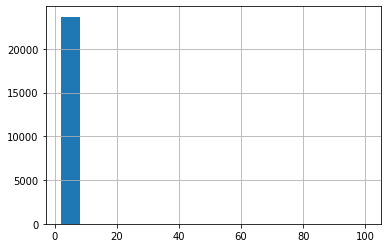

(array([23675,     2,    19,     2,     0,     0,     0,     0,     0,
           1]), array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
        90.1, 100. ]))


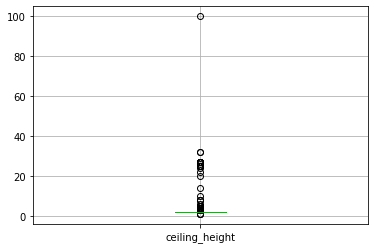

In [48]:
info_graf(realty,realty['ceiling_height']) # Стандартное отклонение более или менее в норме, но максимальная
# высота потолка 100 метров значительно выбивается из общей картины. Эта высота больше, чем в Тадж Махале. 
print(np.histogram(realty['ceiling_height']))
# Основная масса объектов не превышает 3.1 метров.

In [49]:
print(len(realty.query('ceiling_height <= 2')) / len(realty)) # потолки высотой 1 метр выглядят аномально. 
print(len(realty.query('ceiling_height >= 40')) / len(realty)) # отрежем значения выше 40 метров. Хотя 40 метров
# тоже слабо себе представляется.
print(realty.query('40 >= ceiling_height >= 2')['ceiling_height'].describe()) # и медиана и среднее вырасли, но 
# теперь данные выглядят более реалистичны. Стандартное отклонение низкое.
ceiling_height_normal = realty.query('40 >= ceiling_height >= 2')# сохраняем данные в отдельной переменной.


0.888560698763661
4.2195873243596775e-05
count   23695.000
mean        2.138
std         0.815
min         2.000
25%         2.000
50%         2.000
75%         2.000
max        32.000
Name: ceiling_height, dtype: float64


### Время продажи квартиры

count   23699.000
mean      156.475
std       213.646
min        -1.000
25%        22.000
50%        74.000
75%       199.000
max      1580.000
Name: days_exposition, dtype: float64


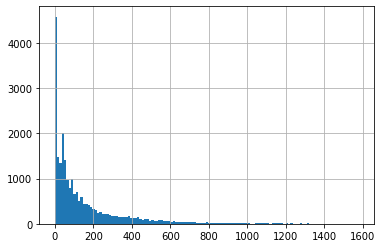

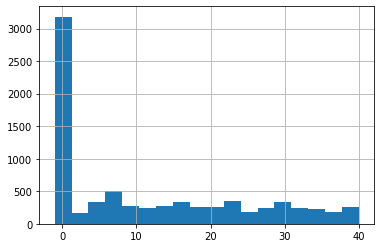

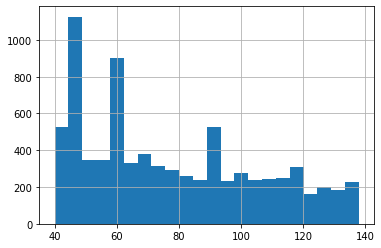

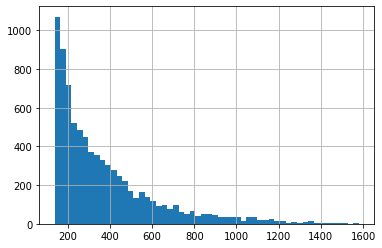

(array([16414,  3586,  1755,   875,   453,   275,   183,    93,    49,
          16]), array([-1.0000e+00,  1.5710e+02,  3.1520e+02,  4.7330e+02,  6.3140e+02,
        7.8950e+02,  9.4760e+02,  1.1057e+03,  1.2638e+03,  1.4219e+03,
        1.5800e+03]))


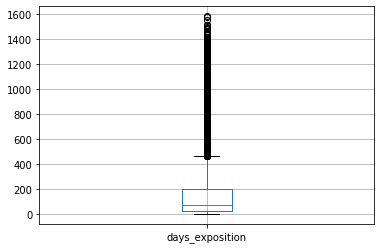

In [50]:
info_graf(realty,realty['days_exposition'])# (Значения -1, это группа объектов, которая до сих пор не снята 
# с продажи). Стандартное отклонение очень высоко.  Среднее значение выше медианного на 83 дня. Причина - 
#большой диапозон. 
print(np.histogram(realty['days_exposition']))


В целом, можно сделать вывод, что больше половины объектов (13233 за вычетом действующих объявлений) продается до 157 дней. Считать очень быстрой продажей можно все сделки, которые состоялись быстрее 74 дней. 
Необычно долгие - те, которые длятся дольше 199 дней. Все объявления со сроком выше 450 дней - выбросы. 
Возможны фейковые объявления либо пользователь не потрудился закрыть объявление на ресурсе. 

In [51]:
print(len(realty.query('days_exposition < 1')) / len(realty)) 
print(len(realty.query('days_exposition > 450')) / len(realty))

print(realty.query('450 >= days_exposition >= 1')['days_exposition'].describe()) #в итоге ограничения выбросов 
# средний показатель опустился и приблизился к медиане. Отрицательные значения не искажают данные.
days_exposition_normal = realty.query('450 >= days_exposition >= 1')# сохраняем данные в отдельной переменной.


0.13422507278788134
0.08924427191020719
count   18403.000
mean      120.227
std       109.762
min         1.000
25%        40.000
50%        82.000
75%       173.000
max       450.000
Name: days_exposition, dtype: float64


### Какие факторы больше всего влияют на стоимость квартиры? 

0.4913382006787265

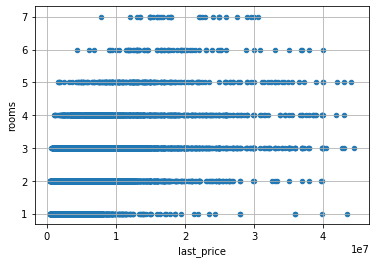

In [52]:
"зависит ли цена от числа комнат?"
# Для поиска зависимостей, создадим новую таблицу с отфильтрованными значениями.
good_realty = realty.query('7 >= rooms >= 1')
good_realty = good_realty.query('45000000 > last_price > 400000')
good_realty = good_realty.query('40 >= ceiling_height >= 2')
good_realty = good_realty.query('days_exposition <= 450')
good_realty = good_realty.query('total_area <= 260')
good_realty.plot(x='last_price', y='rooms', kind='scatter', grid=True)
good_realty['last_price'].corr(good_realty['rooms'])


График и коэффицент корреляции говорят о том, что связь между количеством комнат и стоимостью квартиры существует и она сильная. Минимальная цена увеличивается, если в квартире комнат больше. При этом, самые дорогие квартиры есть в квартирах и с 1 комнатой. Тем не менее, это исключения, подтверждающие правило.

0.780910559084756

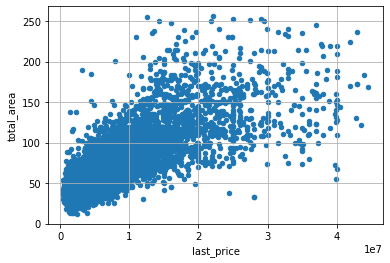

In [53]:
"Зависит ли цена от квадратных метров?"
good_realty.plot(x='last_price', y='total_area', kind='scatter', grid=True)
good_realty['last_price'].corr(good_realty['total_area'])

Зависимость данных показателей еще более выражена. Корреляция очень сильная и она линейна. Есть редкие случаи,
которые не поддаются зависимости. Судя по всему, на их стоимость влияют и другие факторы.

0.12350290596662954

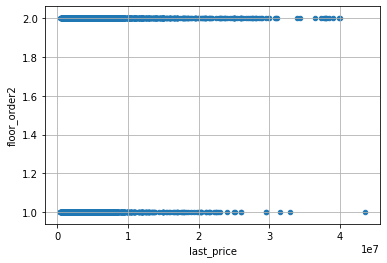

In [54]:
"Зависит ли цена от этажа (последний/ первый)?"
good_realty2 = good_realty # создадим таблицу с выборкой этажей 
def floors_order_upadate(floor_order):
    '''Возвращает этаж квартры, используя правила:
    - '1' при значении floor_order == 'первый'
    - '2' при значении floor_order == 'последний'
    - '3' в остальных случаях'''
    if floor_order == 'первый':
        return 1
    if floor_order == 'последний':
        return 2
    else:
        return 3
good_realty2['floor_order2'] = good_realty2['floor_order'].apply(floors_order_upadate) # сохраняем
# новый столбец
good_realty2 = good_realty2.query('floor_order2 < 3') 
good_realty2.plot(x='last_price', y='floor_order2', kind='scatter', grid=True)
good_realty2['last_price'].corr(good_realty2['floor_order2'])



Корреляция отсутвтвует. Минимальная цена примерно на одном уровне. Тем не менее, более дорогие квартиры чаще встречаются на последних этажах.

-0.024397938151762003

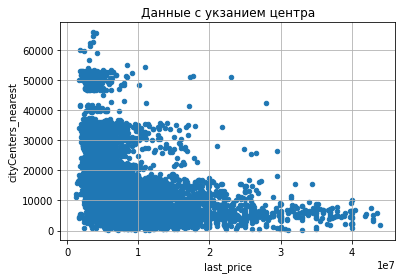

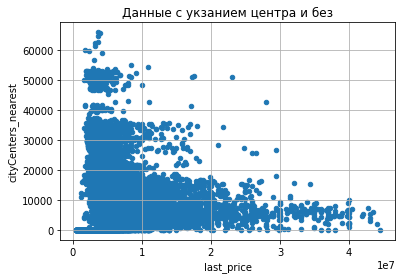

In [55]:
"Зависит ли цена от удаленности от центра?"
good_realty.query('cityCenters_nearest >= 0').plot(x='last_price', y='cityCenters_nearest', title =\
                                                   'Данные с укзанием центра', kind='scatter', grid=True)
good_realty.plot(x='last_price', y='cityCenters_nearest', title ='Данные с укзанием центра и без',\
                 kind='scatter', grid=True)
good_realty['last_price'].corr(good_realty['cityCenters_nearest'])


В данном случае корреляция обратная, но сильная. Чем меньше расстояния от центра, тем меньше более дорогих квартир. Квартиры с высоким прайсом чаще встречаются ближе к центру. 
Квартиры, в которых не указана удаленность (-1) имеют самый низкий ценник. Вероятно по причине, что в данных населенных пунктах эта величина не имеет смысла.

-0.01071363426233407

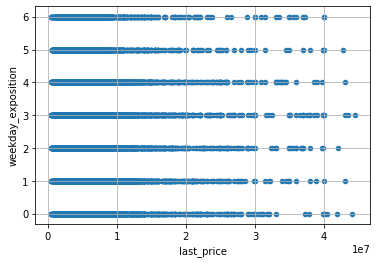

In [56]:
"Зависимость от даты размещения: дня недели"

good_realty.plot(x='last_price', y='weekday_exposition', kind='scatter', grid=True)
good_realty['last_price'].corr(good_realty['weekday_exposition'])
# В данном случае корреляция и зависимость отсутствуют. Чаще объявления выкладывают в начале недели.

[2019 2018 2017 2016 2015 2014]


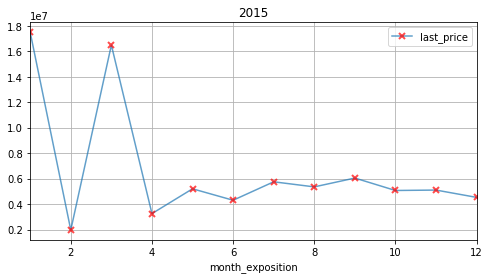

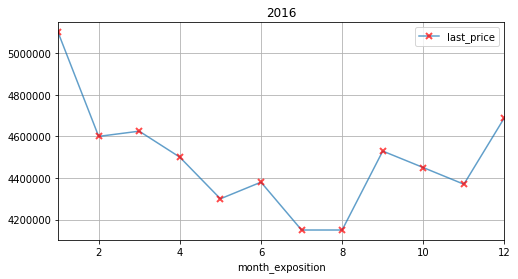

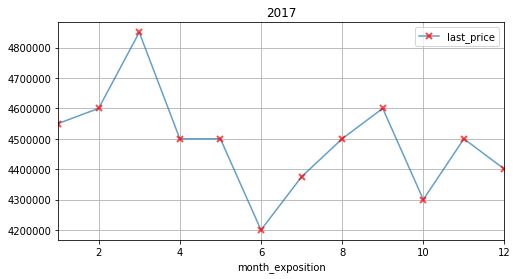

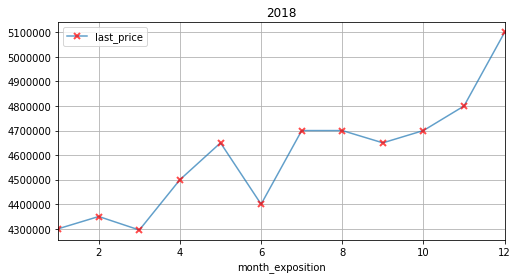

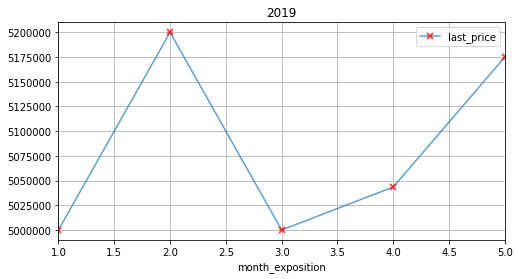

-0.008110846162565464
-0.0016455355722641547


In [57]:
"Зависимость от месяца и года"
# Проверим, какие архив каких лет хранится в таблице.
print(good_realty['year_exposition'].unique())
def plot_year_month(df):
    "Делит месяца в зависимости от года и возвращает диаграмму рассеяния относительно цены"
    year_list = ['2015', '2016', '2017', '2018', '2019'] # создаем список с годами
    for row in year_list:
        (df
        .query('year_exposition == @row')
        .pivot_table(index='month_exposition', values='last_price', aggfunc='median')
        .plot(style='x-', alpha=0.7, mew=2, mec='r', figsize=(8, 4), title=row, grid=True))  
        plt.show()
plot_year_month(good_realty)
print(good_realty['last_price'].corr(good_realty['year_exposition']))
print(good_realty['last_price'].corr(good_realty['month_exposition']))


Исходя из полученных данных, можно сделать вывод о том, что сервис Яндекс Недвижимость стал набирать обороты по количеству объявлений со второго квартала 2015 года. 2017  и 2018 - самые насыщеные года по продаже квартир в данном сервисе. В том числе, больше объявлений более дорогих квартир было опубликовано так же в эти годы.
 Данные за 2019 указаны только до мая. С марта 2015, средняя цена снижалась с 6млн 42 млн. ,но с марта 2018  средняя цена начала расти и к апрелю 2019 добралась до отметки 28 млн.
 Зависимость цены от месяца и года крайне низкая. Нет выраженной сезонности.

## 10 населённых пунктов с наибольшим числом объявлений 

In [58]:
top = good_realty.groupby('locality_name')['locality_name'].count()#  Группируем все населенные пункты и 
#находим кол-во объявлений
top = top.sort_values(ascending = False) # с помощью сортировки находим ТОП 
top_10_name = ['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Колпино',\
               'посёлок Парголово','Пушкин', 'деревня Кудрово', 'Гатчина', 'Выборг']
top_10 = good_realty.query('locality_name == @top_10_name').pivot_table(index='locality_name',\
                                                                        values='price', aggfunc=\
                                                                        ['mean', 'max', 'min'])
top_10



,mean,max,min
,price,price,price
locality_name,,,
Всеволожск,69113.003,642444.737,31400.000
Выборг,58343.800,107473.118,18750.000
Гатчина,69214.811,146315.789,10507.246
Колпино,75609.233,125000.000,48214.286
Пушкин,103307.081,256521.739,59836.066
Санкт-Петербург,112130.294,848484.848,15384.615
деревня Кудрово,92981.655,142857.143,54336.957
посёлок Мурино,85900.846,140312.500,50000.000


ТОП 10. 
Самая высокая стоимость жилья - в Санкт-Петербурге. Самая низкая стоимость жилья, относительно средней стоимости - в Выборге. Минимальная по стоимости недвижимость - в Гатчине.  

## Анализ зависимости цены и удаленност от центра в квартирах Санкт-Петербурга

-0.4016978627774895

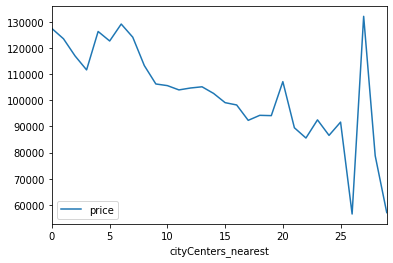

In [59]:

good_realty_spb = good_realty.loc[good_realty['locality_name'] == "Санкт-Петербург"].copy() 
# создаем новую таблицу 
good_realty_spb['cityCenters_nearest'] = good_realty_spb['cityCenters_nearest'].map(lambda x: x/1000).\
astype(int)
good_realty_spb['price'].astype(int)
good_realty_spb.pivot_table(index='cityCenters_nearest', values='price', aggfunc='median').plot()
good_realty_spb['last_price'].corr(good_realty_spb['cityCenters_nearest'])

Корреляция зависимости цены от расстояния от центра умеренная. Центр города в Санкт-Петербурге достаточно большой. Тем не менее, цена резко падает по удалению на 7 км. Это растояние возьмем за определение центра в дальнейшем анализе. Интересно, что недвижимость более цдаленная от центра так же резко поднимается в цене в районе 27 км от центра. Вероятно в данном случае на цену влияют и другие факторы.

## Анализ квартир в центре Санкт-Петербурга

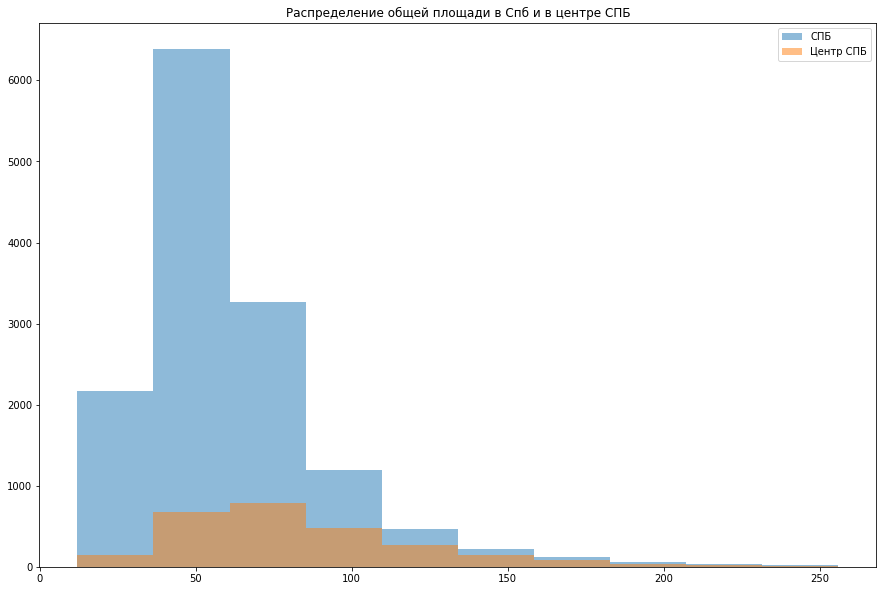

In [60]:

plt.figure(figsize = (15,10))
plt.title('Распределение общей площади в Спб и в центре СПБ')
plt.hist(good_realty.query('locality_name == "Санкт-Петербург" and cityCenters_nearest >= 0')['total_area'],\
         bins = 10, alpha = 0.5, label ='СПБ')
plt.hist(good_realty.\
         query('locality_name == "Санкт-Петербург" and 0 <= cityCenters_nearest < 7000')['total_area'],\
         bins = 10, alpha = 0.5, label = 'Центр СПБ')
plt.legend(prop={'size': 10});
 

В рамках всего города, по количеству лидирует недвижимость площадью от 40 до 60 кв.м. В центра, большинство объектов находится в рамказ от 60 до 80 кв.м. Это может быть связано с большим количеством новостроек, типовых квартир. Объктов площадью до 40 кв.м. в центре так же меньше, чем квартир с площадью от 80 до 100 кв., что не совпадает с картиной по всему городу.

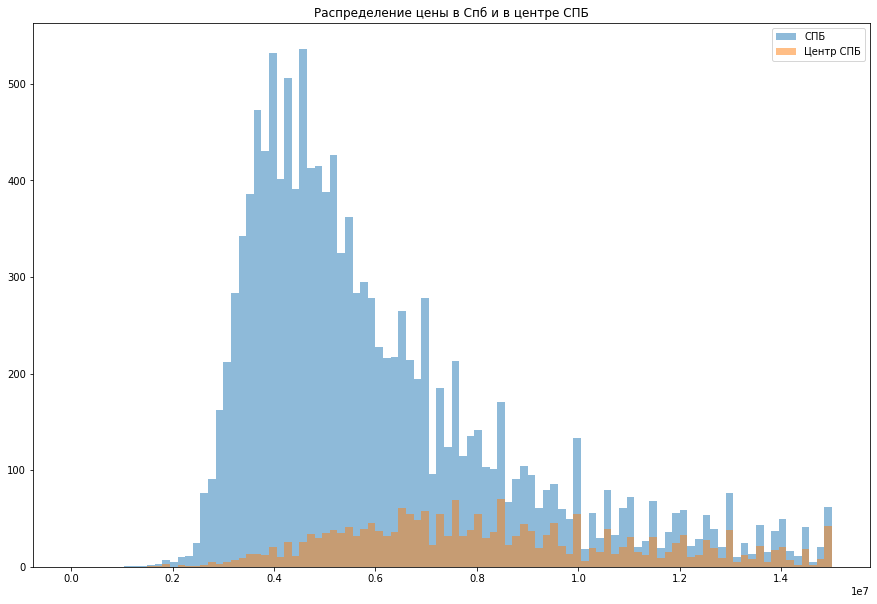

In [61]:
plt.figure(figsize = (15,10))
plt.title('Распределение цены в Спб и в центре СПБ')
plt.hist(good_realty.\
         query('locality_name == "Санкт-Петербург" and cityCenters_nearest >= 0')['last_price'],\
         bins=100, range=(0, 15*10**6), alpha = 0.5, label ='СПБ')
plt.hist(good_realty.\
         query('locality_name == "Санкт-Петербург" and 0 <= cityCenters_nearest < 7000')['last_price'],\
         bins=100, range=(0, 15*10**6), alpha = 0.5, label = 'Центр СПБ')
plt.legend(prop={'size': 10});



Существенная часть объектов из архива по всему городу приходится на первую четверть всего размаха стоимости.
При этом среди квартир в центре, определенно меньшая доля относится к низуой стоимости. Основная часть недвижимости в центре более дорогая, относительно всего города.

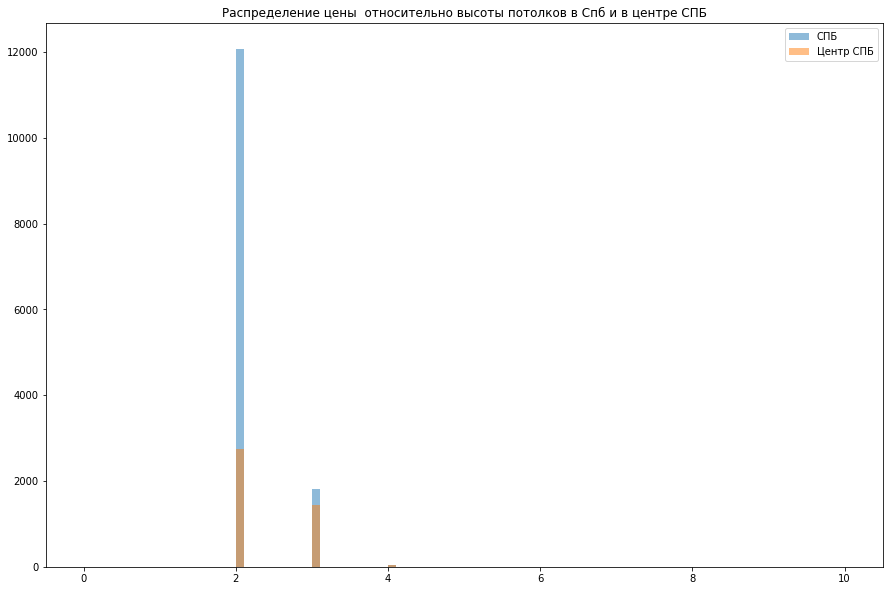

In [62]:
plt.figure(figsize = (15,10))
plt.title('Распределение цены  относительно высоты потолков в Спб и в центре СПБ')
plt.hist(good_realty.\
         query('locality_name == "Санкт-Петербург" and cityCenters_nearest >= 0')['ceiling_height'],\
         bins=100, range=(0,10), alpha = 0.5, label ='СПБ')
plt.hist(good_realty.\
         query('locality_name == "Санкт-Петербург" and 0 <= cityCenters_nearest < 10000')['ceiling_height'],\
         bins=100, range=(0,10), alpha = 0.5, label = 'Центр СПБ')
plt.legend(prop={'size': 10});


Основная часть недвижимости с более высокими потолками находится в центре города. Это логично, т.к.  в центре много исторической постройки. В целом по городу, основную часть составляют квартиры со стандартными масштабами.

В центре Санкт-Петербурга, относительно всего города более дорогое, масштабное и высокое жилье. Тем не менее, встречаются исключения, которые поддерживают общие тенденции.

## Факторы, влияющие на цены квартир в центре СПБ

0.5212545530709055
0.42266880230392545


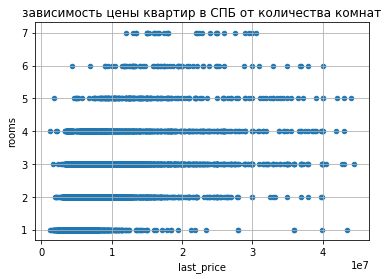

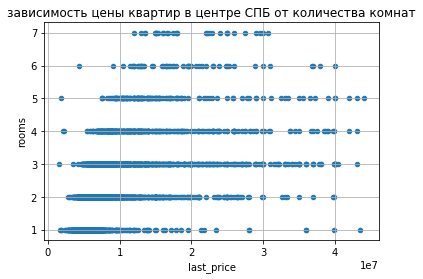

In [63]:

"Интересующие факторы: число комнат, этаж, удалённость от центра, дата размещения объявления"

#создадим новую таблицу с квартирами в центре СПБ
good_realty_center_nearest = good_realty.\
query('locality_name == "Санкт-Петербург" and 0 <= cityCenters_nearest < 7000')

#зависимость цены от количества комнат
good_realty_spb.\
plot(x='last_price', y='rooms', kind='scatter', title = 'зависимость цены квартир в СПБ от количества комнат',\
     grid=True)
good_realty_center_nearest.query('0 <= cityCenters_nearest < 7000').\
plot(x='last_price', y='rooms', kind='scatter', title =\
     'зависимость цены квартир в центре СПБ от количества комнат', grid=True)

print(good_realty_spb['last_price'].corr(good_realty_spb['rooms']))
print(good_realty_center_nearest['last_price'].corr(good_realty_center_nearest['rooms']))


В масштабах города, зависимость цены от количества комнат достаточно сильная сильнее на 0.1. Вероятно, это связано с тем, что в центре больше квартир с общей площадью, превышающей стандартную. Тем не менее, в центре  корреляция и зависимость так же очевидна.

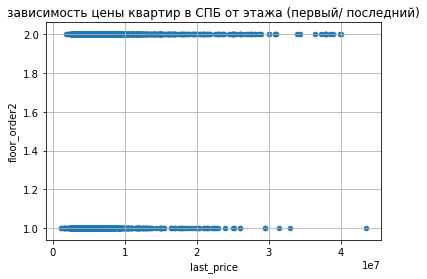

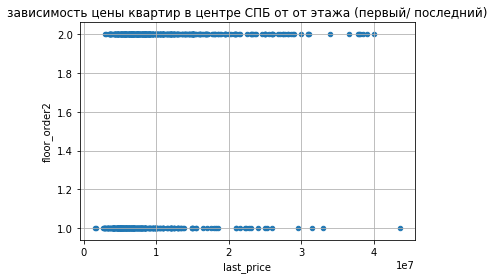

In [64]:
#зависимость цены от этажа
good_realty2.query('locality_name == "Санкт-Петербург" and cityCenters_nearest >= 0').\
plot(x='last_price', y='floor_order2', kind='scatter', title =\
     'зависимость цены квартир в СПБ от этажа (первый/ последний)', grid=True)
good_realty2.query('locality_name == "Санкт-Петербург" and 0 <= cityCenters_nearest < 7000').\
plot(x='last_price', y='floor_order2', kind='scatter', title =\
     'зависимость цены квартир в центре СПБ от от этажа (первый/ последний)', grid=True);



В обоих случаях, зависимость цены от этажа - низкая, но более дорогих квартир больше на последних этажах.

-0.034553739893611754


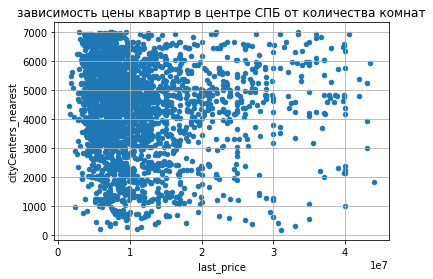

In [65]:
good_realty_center_nearest.query('0 <= cityCenters_nearest < 7000').\
plot(x='last_price', y='cityCenters_nearest', kind='scatter', title =\
     'зависимость цены квартир в центре СПБ от количества комнат', grid=True)

print(good_realty_center_nearest['last_price'].corr(good_realty_center_nearest['cityCenters_nearest']))


В случае изменения зависимости цены от расстояния от центра в ЦЕНТРЕ города, корреляция слабая и не линейная.
В разрезе всего города, эта зависимость прослеживается лучше. Это означает, что центр города достаточно большой и на стоимость в данном отрезке влияют также другие факторы.

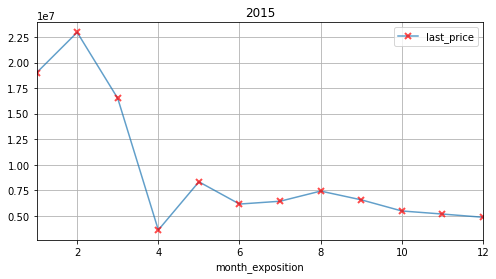

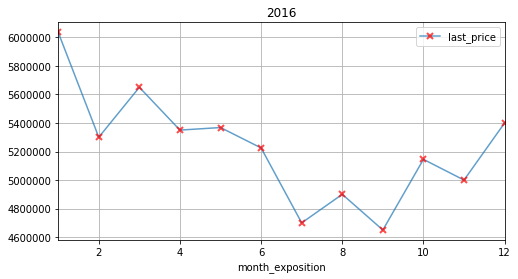

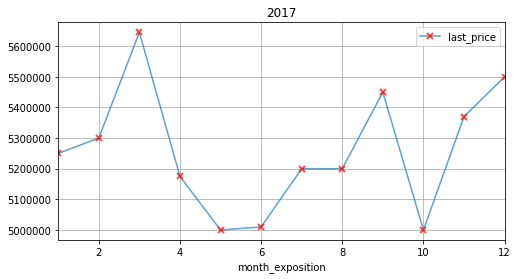

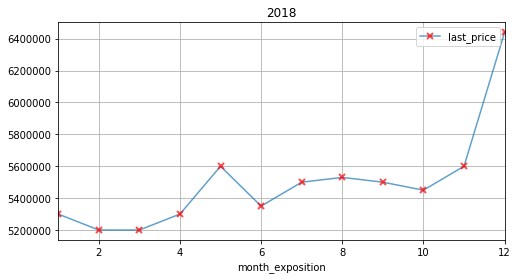

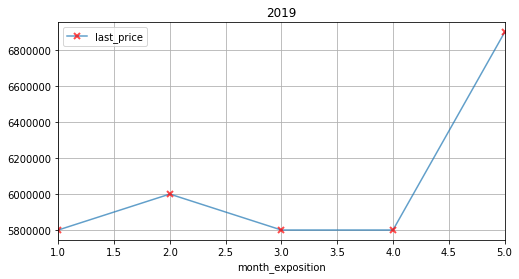

None


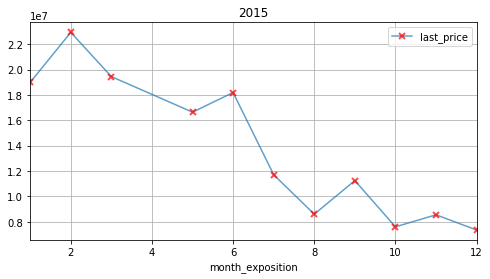

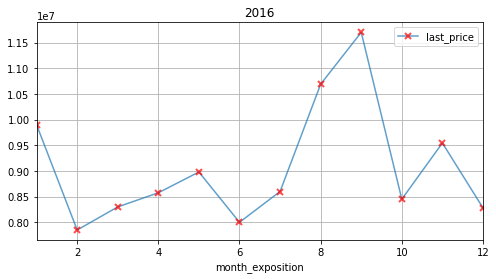

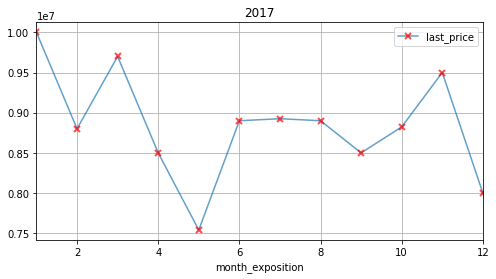

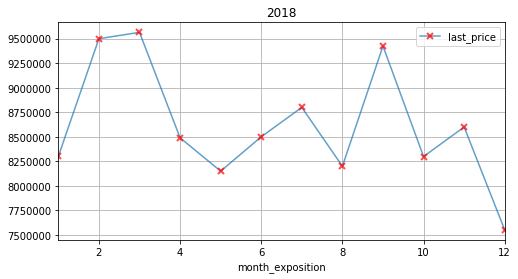

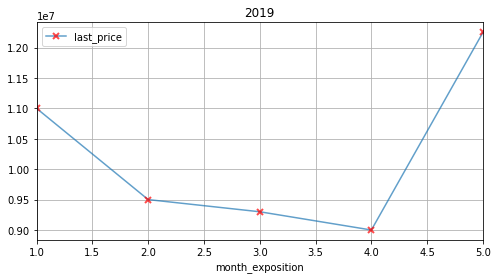

None
Корреляция по году в СПБ: -4.262140304927205e-05
Корреляция по месяцу в СПБ: -0.008584339622524835
Корреляция по году в центре СПБ: 0.012184304762000945
Корреляция по месяцу в центре СПБ: -0.035684184245913755


In [66]:
print(plot_year_month(good_realty_spb))
print(plot_year_month(good_realty_center_nearest))

print('Корреляция по году в СПБ:', good_realty_spb['last_price'].corr(good_realty_spb['year_exposition']))
print('Корреляция по месяцу в СПБ:', good_realty_spb['last_price'].corr(good_realty_spb['month_exposition']))
print('Корреляция по году в центре СПБ:', good_realty_center_nearest['last_price'].\
      corr(good_realty_center_nearest['year_exposition']))
print('Корреляция по месяцу в центре СПБ:',good_realty_center_nearest['last_price'].\
      corr(good_realty_center_nearest['month_exposition']))


Закономерной зависимости цены относительно года и месяца публикации объявлений нет. В целом, данные дублируют анализ общего df - good_realty.

При сравнении показателей в центре города и по всему Санкт-Петербургу, было обнаружено:
- значительная часть недвижимости в центре - дороже, чем в целом по городу.
- на стоимость в большей степени влияет общая площадь, которая в центре выше. по всему городу - количество комнат
- в центре города более высокие потолки, что также может говорить о влиянии на цену


## Общий вывод

Для определения рыночной стоимости недвижимости, необходимо определить параметры, которые на нее влияют.
Отталкиваясь от задачи проекта, можно сделать следующие выводы:
Значительные параметры: 
- Близость к крупному городу. Чем ближе - тем дороже.
- Количество и общая площадь. Основные факторы, влияющие на стоимость.
- Удаленность от центра. Более дорогие квартиры находятся в центре.
 
Смежные параметры:
- Этаж квартиры. На последних этажах квартиры дороже. Но данный параметр не обладает сильным влиянием. Может рассматриваться совместно с более значимыми.
- Высота потолков. Основная часть квартир с потолками выше 3 метров находится в центре. Как правило, такие квартиры обладают и другими параметрами, влияющими на стоимость. Высота потолка может быть дополнительным параметром для формирования стоимости.
- Год публикации. С 2015 года, средняя стоимость недвижимости менялась по всему городу и области. На это могут влиять различные социально-экономические факторы. Стоит учитывать тенденции текущего времени для определения стоимости.

Не значительные параметры:
- день недели, дата публикации.
